In [1]:
import ase
from ase.io import read
import dscribe
from dscribe.descriptors import SOAP
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

from spyrmsd import rmsd

import pandas as pd


In [12]:
water6 = "/home/boittier/Documents/phd/ff_energy/ff_energy/sampling/6_TIP3.xyz"

trajwater6 = read(water6,index='::20') 

In [13]:
def soap(rcut=6.0, nmax=8, lmax=4, species=("H", "O"), average="inner", weighting=None):
    # Setting up the SOAP descriptor
    soap = SOAP(
        species=species,
        periodic=False,
        r_cut=rcut,
        n_max=nmax,
        l_max=lmax,
        average=average,
        weighting=weighting,
    )
    return soap

In [14]:
soap = soap()

In [15]:
water6soap = soap.create(trajwater6)
water6soap.shape

(5367, 680)

In [16]:
water6soap[0].shape

(680,)

In [17]:
cosine_similarity([water6soap[0]], water6soap)

array([[1.        , 0.99968554, 0.99624314, ..., 0.99964323, 0.99823614,
        0.99945499]])

In [18]:
# def rmsd(
#     coords1: np.ndarray,    # Coordinates of molecule 1
#     coords2: np.ndarray,    # Coordinates of molecule 2
#     aprops1: np.ndarray,    # Atomic properties of molecule 1
#     aprops2: np.ndarray,    # Atomic properties of molecule 2
#     center: bool = False,   # Flag to center molecules at origin
#     minimize: bool = False, # Flag to compute minimum RMSD
#     atol: float = 1e-9,     # Numerical tolerance for QCP method
# )

In [19]:
positions = [ _.get_positions() for _ in trajwater6]

In [20]:
atomic_numbers = trajwater6[0].get_atomic_numbers()

In [21]:
# rmsd.rmsd(, trajwater6[1].get_positions(), atomic_numbers, atomic_numbers)

In [22]:
AM = np.array([[1, 1, 1, 0, 0, 0],
     [1, 1, 1, 0, 0, 0],
     [1, 1, 1, 0, 0, 0],
     [ 0, 0, 0, 1, 1, 1],
     [ 0, 0, 0, 1, 1, 1],
     [ 0, 0, 0, 1, 1, 1]])

# AM = np.ones((9,9))

In [23]:
rmsd.symmrmsd(positions[0], positions[1], atomic_numbers, atomic_numbers, AM, AM, center=True, minimize=True)

/home/boittier/miniconda3/envs/pycharmm/lib/python3.8/site-packages/spyrmsd/graphs/nx.py:42: UserWarning: Disconnected graph detected. Is this expected?
  warnings.warn(warn_disconnected_graph)


0.40889876258787766

In [24]:
sym_rmsd = []
cosign_sim = []

for i in range(len(positions)):
    # sym_rmsd.append(rmsd.symmrmsd(positions[i], positions, atomic_numbers, atomic_numbers, AM, AM, center=True, minimize=True))
    cosign_sim.append(cosine_similarity([water6soap[i]], water6soap))

In [28]:
shape = np.array(cosign_sim).shape[0]

In [31]:
print(shape)

5367


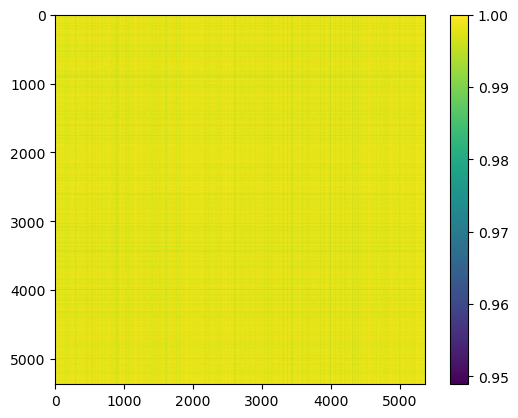

In [29]:
plt.imshow(np.array(cosign_sim).reshape(shape,shape,1))
plt.colorbar()

In [30]:
DATA = pd.DataFrame([_[0] for _ in cosign_sim])

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# kmeans = KMeans(n_clusters=10000, random_state=0, n_init="auto").fit(DATA)

In [34]:
TESTDATA = DATA.to_numpy() 
TESTDATA.shape

(5367, 5367)

In [35]:
water6soap.shape

(5367, 680)

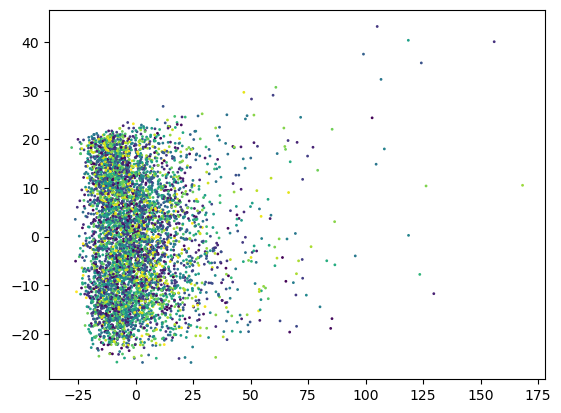

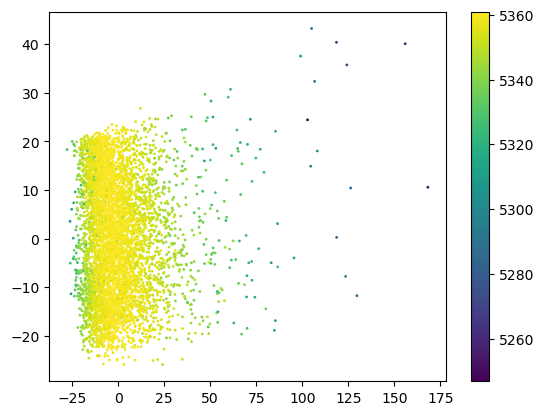

In [37]:
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=1000, random_state=0, n_init="auto").fit(water6soap)

pca = PCA(n_components=2)
PCA = pca.fit_transform(StandardScaler().fit_transform(water6soap)).T

plt.scatter(PCA[0], PCA[1], c=kmeans.labels_, s=1)
plt.show()
# plt.scatter(PCA[0], PCA[1], c=dn["leaves_color_list"], s=1, alpha=1)
# plt.show()
plt.scatter(PCA[0], PCA[1], c=DATA.sum(), s=1, alpha=1)
plt.colorbar()

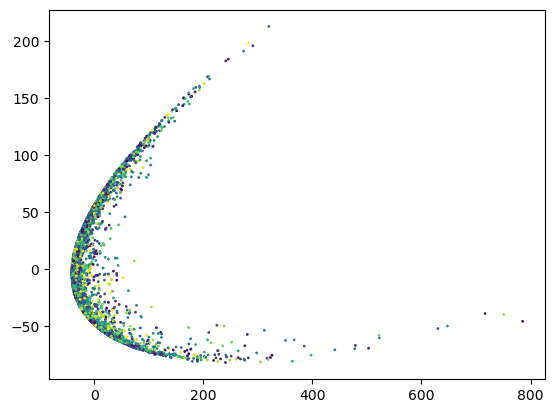

In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCA = pca.fit_transform(StandardScaler().fit_transform(TESTDATA)).T

plt.scatter(PCA[0], PCA[1], c=kmeans.labels_, s=1)

In [39]:
plt.scatter(PCA[0], PCA[1], c=dn["leaves_color_list"], s=1, alpha=1)

NameError: name 'dn' is not defined

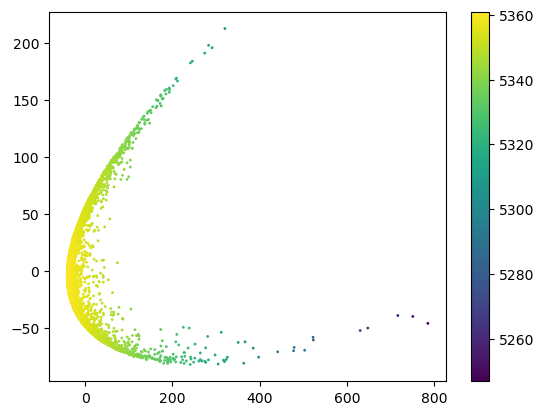

In [40]:
plt.scatter(PCA[0], PCA[1], c=TESTDATA.sum(axis=1), s=1, alpha=1)
plt.colorbar()

In [46]:
DATA["SUM"] =  DATA.sum()

In [47]:
DATA["LABELS"] = kmeans.labels_ 


In [48]:
DATA = DATA.sort_values("SUM")

In [49]:
keys = []
indexes = []
for row in DATA[["SUM", "LABELS"]].iterrows():
    k = row[1][1]
    if k not in keys:
        keys.append(k)
        indexes.append(row[0])
        # print(row[0], int(k))

In [50]:
print(len(set(indexes)))

1000


In [51]:
from ase.io import write

In [241]:
# trajwater9[indexes]

In [53]:
for i, idx in enumerate(indexes):
    write(f"dimers/{i}.xyz", trajwater6[idx])

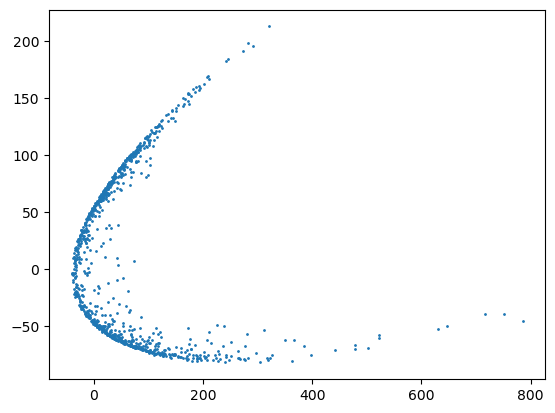

In [54]:
plt.scatter(PCA[0][indexes], PCA[1][indexes], 
            # c=dn["leaves_color_list"][indexes],
            s=1, alpha=1)

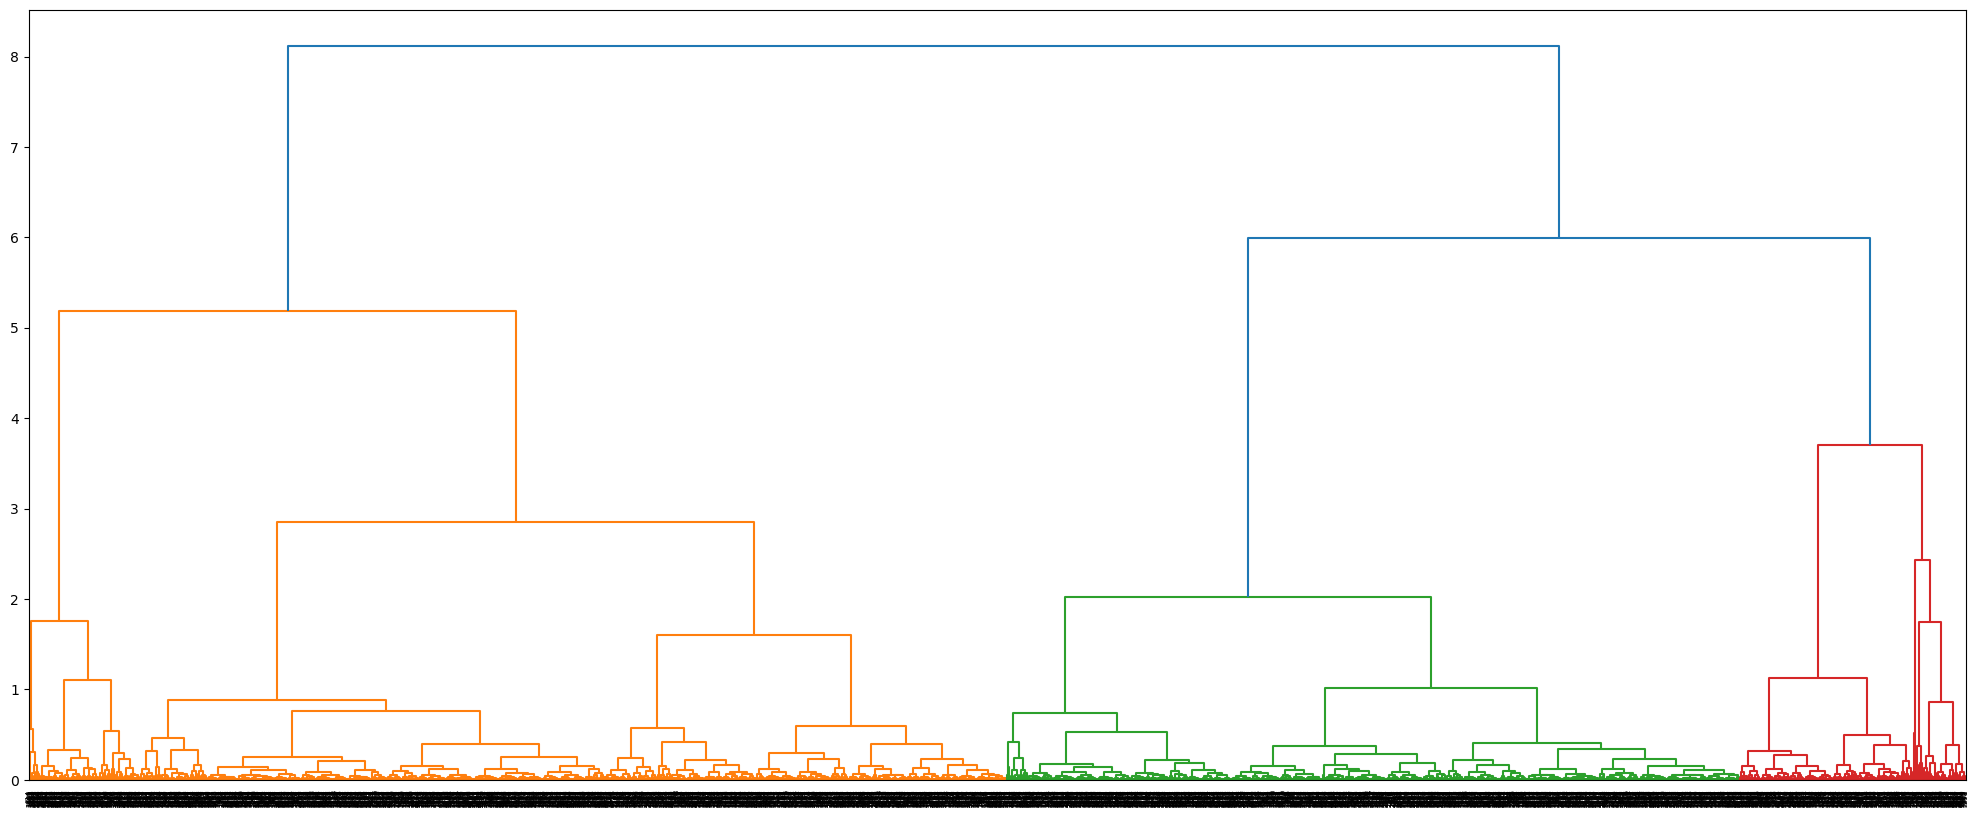

In [48]:
DATA = pd.DataFrame([_[0] for _ in cosign_sim])

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(DATA, 'ward')
fig = plt.figure(figsize=(25.0, 10.0))
dn = dendrogram(Z, get_leaves=True, distance_sort=True)

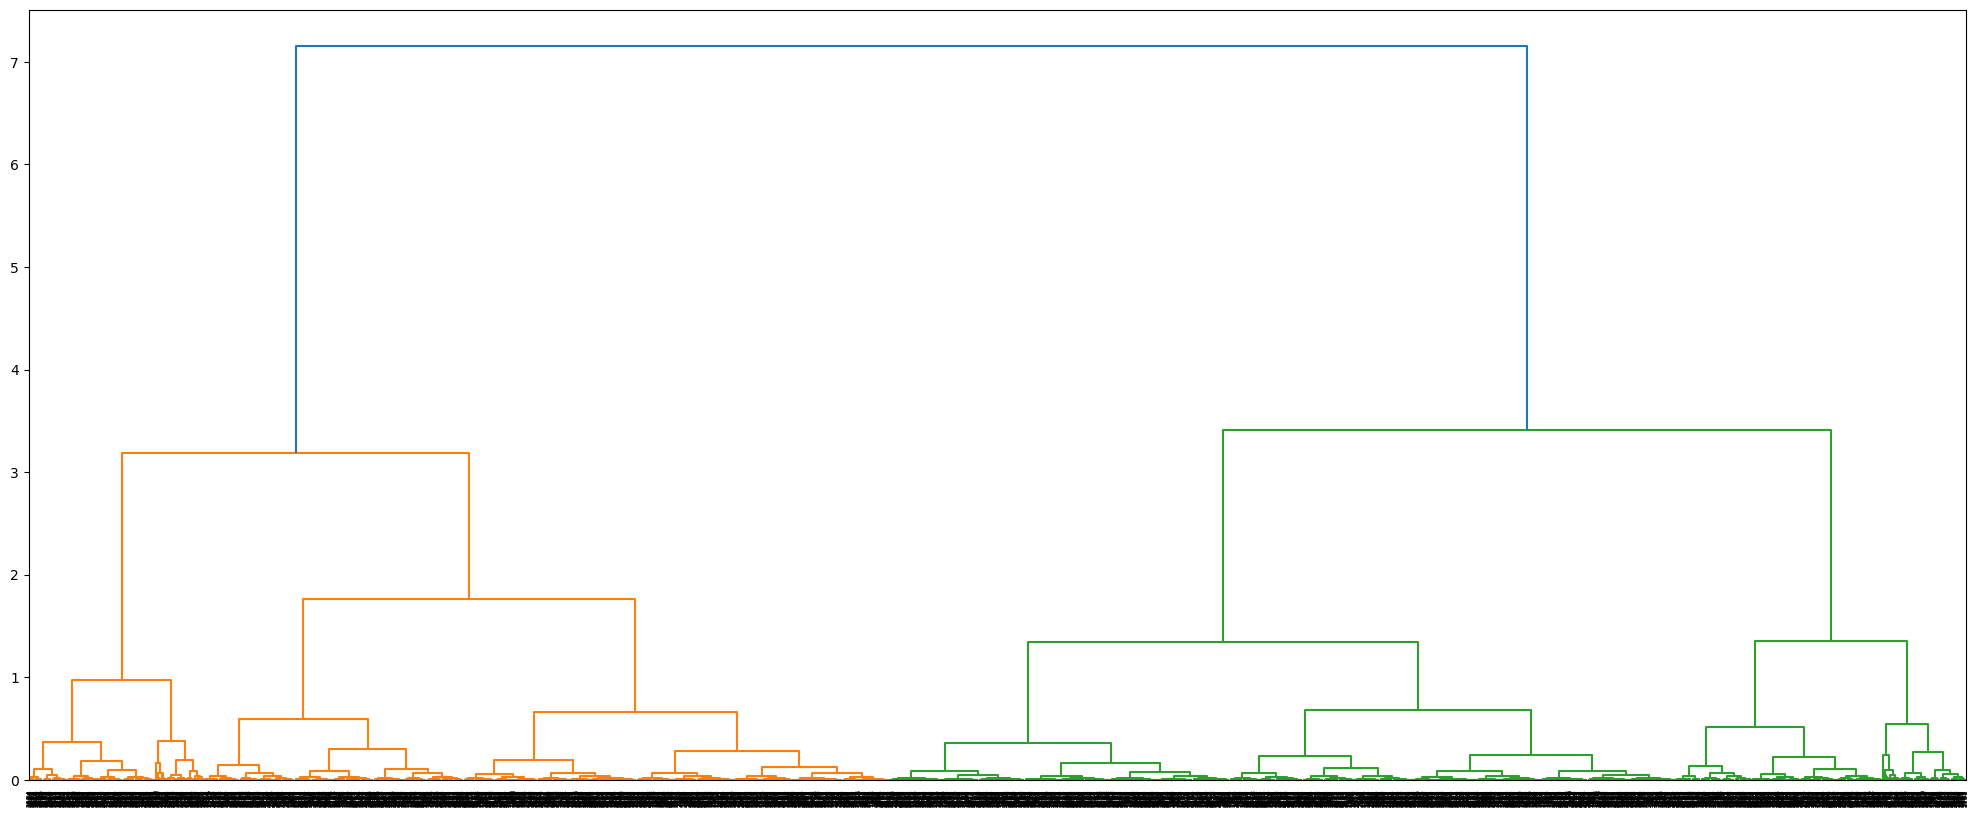

In [49]:
DATA = pd.DataFrame([_[0] for _ in sym_rmsd])

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(DATA, 'ward')
fig = plt.figure(figsize=(25.0, 10.0))
dn = dendrogram(Z, get_leaves=True, distance_sort=True)

In [57]:
shape = np.array(cosign_sim).shape[0]
IM = np.array(cosign_sim).reshape(shape, shape, 1)

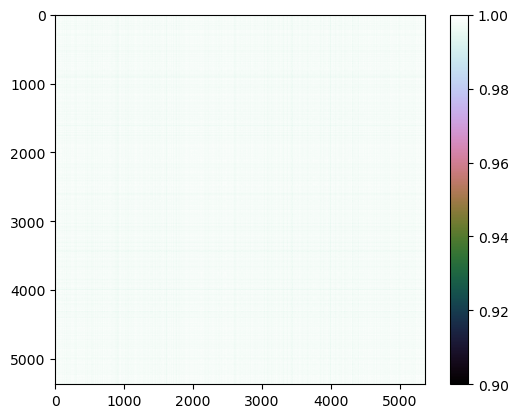

In [58]:
plt.imshow(IM,  cmap="cubehelix")
plt.clim(0.9,1)
plt.colorbar()

In [59]:
IM[indexes][:,indexes,0].shape

(1000, 1000)

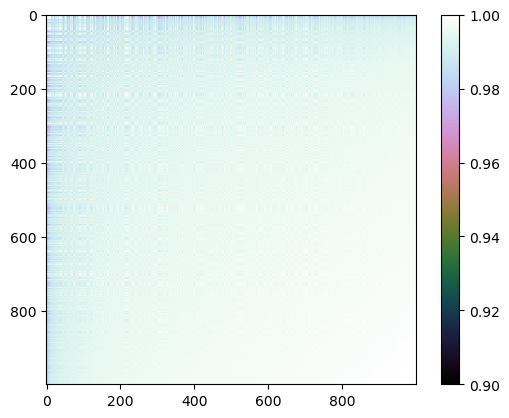

In [60]:
plt.imshow(IM[indexes][:,indexes,0], cmap="cubehelix")
plt.clim(0.9,1)
plt.colorbar()
